# Réaliser une analyse exploratoire portant sur les arbres de Paris

<img src="trees.png" alt="trees" width="700"/>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## I Présentation générale du jeu de données

<img src="oeil.png" alt="oeil" width="100"/>

Un coup d'oeil aux données (5 premieres lignes)

In [2]:
# import de l'échantillon
data = pd.read_csv("P2_02_arbres.csv", sep=";")
data[0:5]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
nbr_row = data.shape[0]
nbr_col = data.shape[1]
print("nombre d'individus : "+ str(nbr_row))
print("nombre de variables : "+ str(nbr_col))
data_numerical = data.select_dtypes(include=np.number)
data_categorical = data.select_dtypes(exclude=np.number)
print("Dont " + str(data_numerical.shape[1]) + " numeriques")
print("Dont " + str(data_categorical.shape[1]) + " categoriques")

nombre d'individus : 200137
nombre de variables : 18
Dont 7 numeriques
Dont 11 categoriques


Visualisation des distributions des 1000 premiers individus par chaque pair de variable.\
On ne regarde pas les variables "id" (pas interessant) et "numero" (vide).

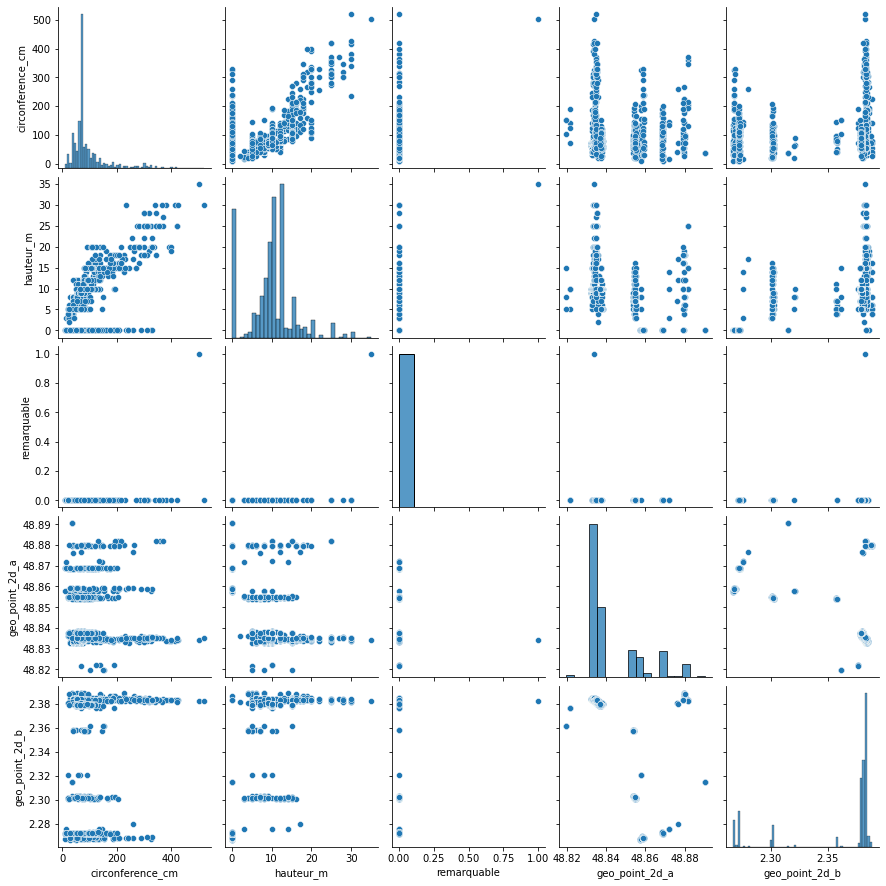

In [4]:
#sns.pairplot(data_numerical[0:1000])
dataPrint = data.drop(["numero","id"], axis = 1, inplace = False)
sns.pairplot(dataPrint[0:1000])
# - id - numero

### Les valeurs manquantes

Total de NaN:  666301


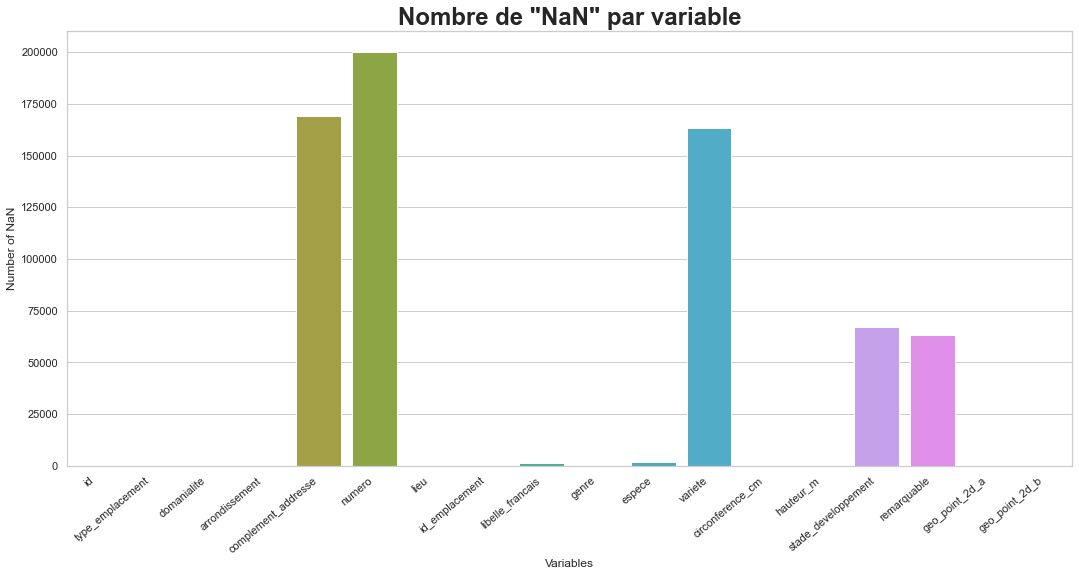

In [5]:
plt.figure(figsize=(18, 8))

nb_nan = data.isna().sum()
# pour voir que les colonnes avec NaN > 100
#nb_nan = nb_nan[nb_nan.values > 100]

d = {'Variables': nb_nan.index, 'Number of NaN': nb_nan.values}
nb_nan_df = pd.DataFrame(data=d)

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Variables", y="Number of NaN", data=nb_nan_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Nombre de \"NaN\" par variable', fontdict= { 'fontsize': 24, 'fontweight':'bold'})

print("Total de NaN: ", str(nb_nan.sum()))

<AxesSubplot:>

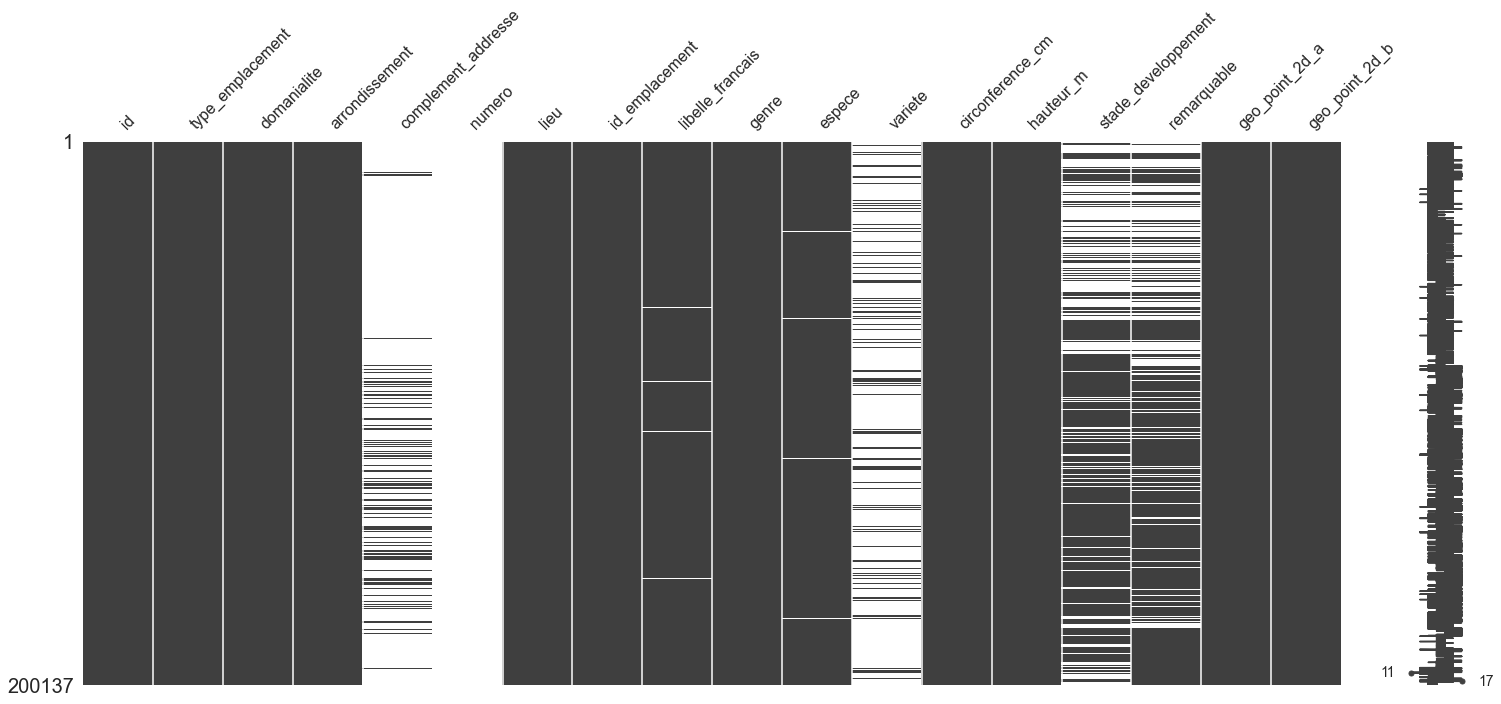

In [6]:
import missingno as msno
msno.matrix(data)

### Les variables categorielles

In [7]:
# les moyennes, médianes et quantiles des distributions sont calculées
stats = {'variable':[], 
        'exemple 1':[],
        'exemple 2':[],
        'exemple 3':[]}

for col in data_categorical.columns:
    stats["variable"].append(col)
    stats["exemple 1"].append(data_categorical[col].unique()[0])
    if len(data_categorical[col].unique()) > 1:
        stats["exemple 2"].append(data_categorical[col].unique()[1])
    else:
        stats["exemple 2"].append("X")
    if len(data_categorical[col].unique()) > 2:
        stats["exemple 3"].append(data_categorical[col].unique()[2])
    else:
        stats["exemple 3"].append("X")

df = pd.DataFrame(stats) 
df 

,variable,exemple 1,exemple 2,exemple 3
0,type_emplacement,Arbre,X,X
1,domanialite,Jardin,Alignement,DJS
2,arrondissement,PARIS 7E ARRDT,PARIS 17E ARRDT,PARIS 16E ARRDT
3,complement_addresse,NaN,c 12,12-36
4,lieu,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...
5,id_emplacement,19,20,21
6,libelle_francais,Marronnier,If,Erable
7,genre,Aesculus,Taxus,Acer
8,espece,hippocastanum,baccata,negundo
9,variete,NaN,Atropunicea',Euchlora'


### Les variables numeriques

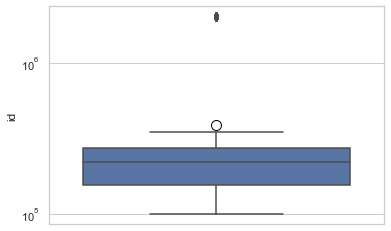

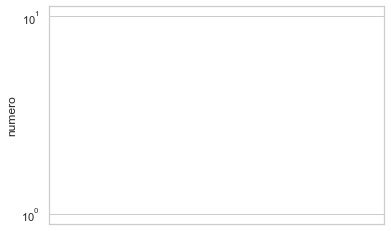

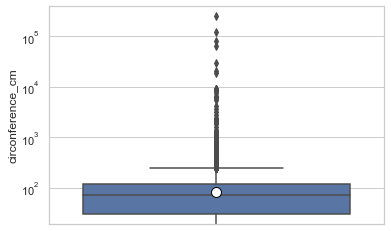

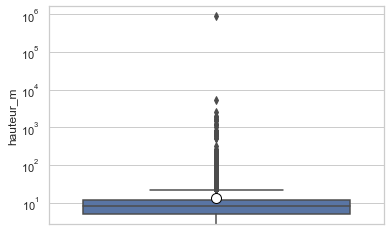

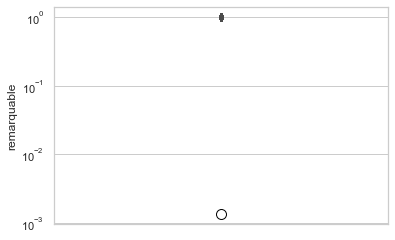

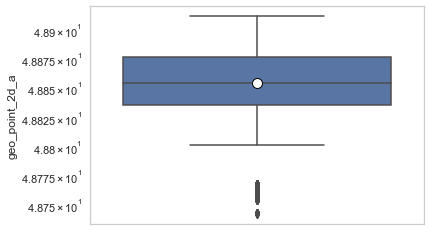

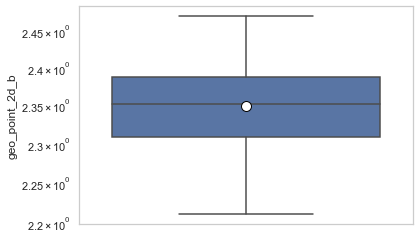

In [8]:
for col in data_numerical.columns:
    ax = sns.boxplot(y=col, data=data, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set_yscale('log')
    if col == "hauteur_m": synthese_hauteur_m = ax
    if col == "circonference_cm": synthese_circonference_cm = ax

    plt.show()

In [9]:
# les moyennes, médianes et quantiles des distributions sont calculées + écart-type
stats = {'variable':[], 
        'moyenne':[],
        'ecart-type':[],
        'max':[], 
        'quartile 1':[],
        'quartile 2':[],
        'quartile 3':[],
        'exemple':[]}

for col in data_numerical.columns:
    stats["variable"].append(col)
    stats["moyenne"].append(data_numerical[col].mean())
    stats["ecart-type"].append(data_numerical[col].std())
    stats["max"].append(data_numerical[col].max())
    stats["quartile 1"].append(data_numerical[col].quantile(q=0.25))
    stats["quartile 2"].append(data_numerical[col].quantile(q=0.5))
    stats["quartile 3"].append(data_numerical[col].quantile(q=0.75))
    stats["exemple"].append(data_numerical[col].unique()[0])

df = pd.DataFrame(stats) 
df 

,variable,moyenne,ecart-type,max,quartile 1,quartile 2,quartile 3,exemple
0,id,387202.682308,545603.242357,2.024745e+06,155927.000000,221078.000000,274102.000000,99874.000000
1,numero,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,circonference_cm,83.380479,673.190213,2.502550e+05,30.000000,70.000000,115.000000,20.000000
3,hauteur_m,13.110509,1971.217387,8.818180e+05,5.000000,8.000000,12.000000,5.000000
4,remarquable,0.001343,0.036618,1.000000e+00,0.000000,0.000000,0.000000,0.000000
5,geo_point_2d_a,48.854491,0.030234,4.891148e+01,48.835021,48.854162,48.876447,48.857620
6,geo_point_2d_b,2.348208,0.051220,2.469759e+00,2.307530,2.351095,2.386838,2.320962


Les variables "hauteur_m" et "circonference_cm" on des valeurs aberrantes (voir col. max).\
Regardons la distribution des variables numeriques à l'aide de graphiques

#### "hauteur_m" et "circonference_cm"

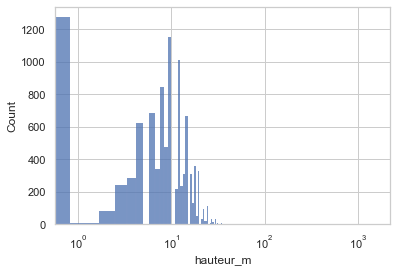

In [10]:
hauteur_without_Nan = data['hauteur_m'][0:10000].dropna()
ax = sns.histplot(hauteur_without_Nan)
ax.set_xscale('log')

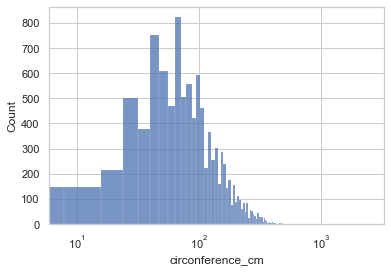

In [11]:
hauteur_without_Nan = data['circonference_cm'][0:10000].dropna()
ax = sns.histplot(hauteur_without_Nan)
ax.set_xscale('log')

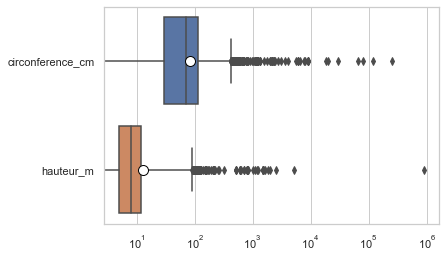

In [12]:
ax = sns.boxplot(data=data[['circonference_cm', 'hauteur_m']], orient="h", whis=[0.1,99.9], showmeans=True, 
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax.set_xscale('log')

## II Démarche méthodologique d’analyse de données

<img src="wash.jpg" alt="nettoyage" width="700"/>

Maintenant que nous avons visualisé nos données, nettoyons les.

### Nettoyage des valeurs manquantes

Ici, on suprime la variable "numero", le reste des valeurs manquantes sont justifiés, il n'est pas utile de les remplacer

In [13]:
data.drop("numero", axis = 1, inplace = True)

### Nettoyage des variables categorielles

Pas de traitement utile.

### Nettoyage des variables numeriques

 **(choix 1)** Methode connaissance metier

In [14]:
def replace_outliers_by_mean(data, col, limite):
    mean = data[col][data[col] < limite].mean()       
    data.loc[data[col] >= limite, col] = mean
    return data

In [15]:
data_experimental = data.copy()

Un sapin de Douglas de **66,60 m** est considéré comme l'arbre le plus haut de France.
On remplace les valeurs (par la moyenne) au dessus de cette limite.
<img src="sapin_geant.jpg" alt="tree" width="100"/>

In [16]:
limite = 66.6

data_experimental = replace_outliers_by_mean(data_experimental, 'hauteur_m', limite)

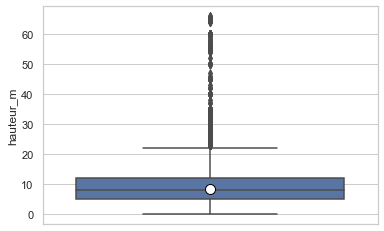

In [17]:
ax = sns.boxplot(y="hauteur_m", data=data_experimental, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

In [18]:
limite_hight_solus1 = limite

Le Sequoiadendron giganteum (Séquoia géant) le plus large de France est de **13,89 m** de circonférence.
On remplace (par la moyenne) les valeurs au dessus de cette limite.
<img src="arbreGROS.jpg" alt="tree" width="300"/>
* https://www.monumentaltrees.com/fr/records/fra/

In [19]:
# 13.89 m = 1389 cm
limite = 1389

data_experimental = replace_outliers_by_mean(data_experimental, 'circonference_cm', limite)

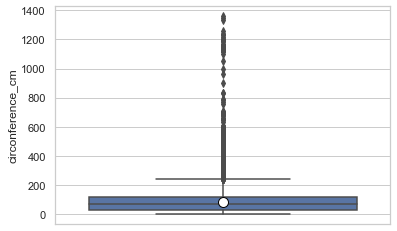

In [20]:
ax = sns.boxplot(y="circonference_cm", data=data_experimental, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

In [21]:
limite_width_solus1 = limite

<font color='red'> **(choix 2)** Methode statistique </font>

Remplacer les outliers avec l' interquartile range ==> on remplace les hauteurs > Q3 + 1.5*IQR\
https://en.wikipedia.org/wiki/Interquartile_range

In [22]:
data_experimental = data.copy()

In [23]:
Q1 = data_experimental['hauteur_m'].quantile(0.25)
Q3 = data_experimental['hauteur_m'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
limite = Q3 + (1.5*IQR)

data_experimental = replace_outliers_by_mean(data_experimental, 'hauteur_m', limite)

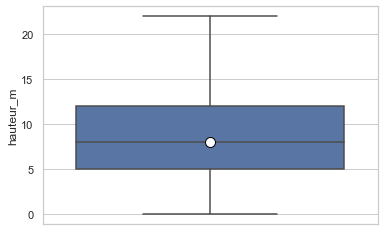

In [24]:
ax = sns.boxplot(y="hauteur_m", data=data_experimental, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

In [25]:
limite_hight_solus2 = limite

In [26]:
Q1 = data_experimental['circonference_cm'].quantile(0.25)
Q3 = data_experimental['circonference_cm'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.  
limite = Q3 + (1.5*IQR)

data_experimental = replace_outliers_by_mean(data_experimental, 'circonference_cm', limite)

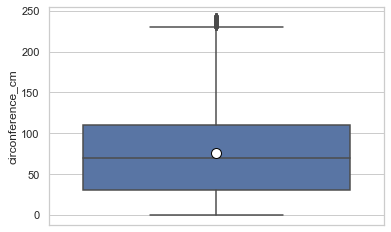

In [27]:
ax = sns.boxplot(y="circonference_cm", data=data_experimental, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

On refait le même traitement encore une fois car il reste des outliers bien visibles

In [28]:
Q1 = data_experimental['circonference_cm'].quantile(0.25)
Q3 = data_experimental['circonference_cm'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.  
limite = Q3 + (1.5*IQR)

data_experimental = replace_outliers_by_mean(data_experimental, 'circonference_cm', limite)

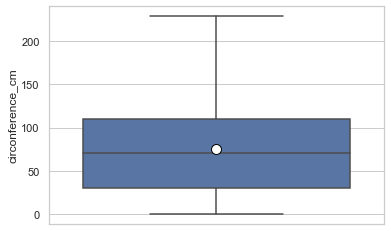

In [29]:
ax = sns.boxplot(y="circonference_cm", data=data_experimental, showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

In [30]:
limite_width_solus2 = limite

<font color='red'> Faire son choix entre **(1) connaissance metier** ou **(2) methode statistique** </font>

In [31]:
choix = 2

In [32]:
if choix == 1: limite = limite_hight_solus1
else: limite = limite_hight_solus2
data = replace_outliers_by_mean(data, 'hauteur_m', limite)

if choix == 1: limite = limite_width_solus1
else: limite = limite_width_solus2
data = replace_outliers_by_mean(data, 'circonference_cm', limite)

## III Synthese

### Traitement des valeurs manquantes

Nous avons laissé les données manquantes justifiées.

### Traitement des variables categorielles

On s'interesse aux variables numeriques.

### Traitement des variables numeriques

Nous avons pu constater que le jeu de données original comporte quelques problémes.\
Surtout au niveau des variables numeriques **"hauteur_m"** et **"circonference_cm"**.\
Pour rappel (avant nettoyage):

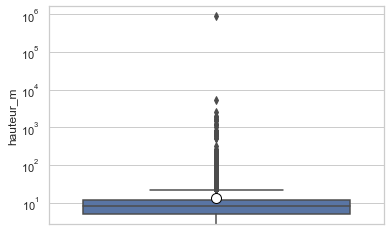

In [33]:
fig = synthese_hauteur_m.get_figure()
fig

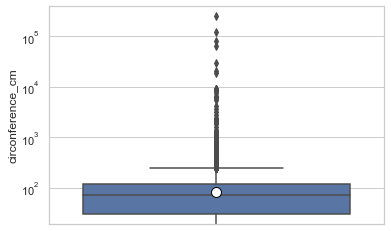

In [34]:
fig = synthese_circonference_cm.get_figure()
fig